## 1. Topological network

In [1]:
## library
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns
import numpy as np

import scipy.stats
import math
from math import sqrt

from networkx import algorithms 
from networkx.algorithms import efficiency 
from networkx.algorithms import global_efficiency

from networkx.algorithms import all_pairs_dijkstra_path_length
from networkx import NetworkXNoPath

In [2]:
# load data
London_flow = pd.read_csv('london_flows.csv')
London_network = nx.read_graphml('london.graph')

In [3]:
London_flow.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [4]:
# print data  information
print(nx.info(London_network))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/3628011614.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(London_network))


In [5]:
# check node information
list(London_network.nodes(data = True))[0:10]

[('Aldgate East', {'coords': '(533886.8526719126, 181342.3600708875)'}),
 ('Liverpool Street', {'coords': '(533127.7645573226, 181621.32983581326)'}),
 ('Whitechapel', {'coords': '(534617.3426706117, 181907.24700468776)'}),
 ('Stepney Green', {'coords': '(535612.2252974329, 182118.9448959187)'}),
 ('Mile End', {'coords': '(536522.8389029178, 182548.59411499347)'}),
 ('Bow Road', {'coords': '(537115.0723258212, 182733.2841917965)'}),
 ('Bromley-by-Bow', {'coords': '(538041.0595055358, 182520.66357835947)'}),
 ('West Ham', {'coords': '(539160.2577659411, 182933.29006798862)'}),
 ('Plaistow', {'coords': '(539974.5301421758, 183288.12269867572)'}),
 ('Upton Park', {'coords': '(541199.4821921758, 183774.6190150809)'})]

In [6]:
# convert corrds string back to tuples using eval()
for node in London_network.nodes():
    London_network.nodes[node]['coords'] = eval(London_network.nodes[node]['coords'])
    

In [7]:
# check node again
list(London_network.nodes(data = True))[0:10]

[('Aldgate East', {'coords': (533886.8526719126, 181342.3600708875)}),
 ('Liverpool Street', {'coords': (533127.7645573226, 181621.32983581326)}),
 ('Whitechapel', {'coords': (534617.3426706117, 181907.24700468776)}),
 ('Stepney Green', {'coords': (535612.2252974329, 182118.9448959187)}),
 ('Mile End', {'coords': (536522.8389029178, 182548.59411499347)}),
 ('Bow Road', {'coords': (537115.0723258212, 182733.2841917965)}),
 ('Bromley-by-Bow', {'coords': (538041.0595055358, 182520.66357835947)}),
 ('West Ham', {'coords': (539160.2577659411, 182933.29006798862)}),
 ('Plaistow', {'coords': (539974.5301421758, 183288.12269867572)}),
 ('Upton Park', {'coords': (541199.4821921758, 183774.6190150809)})]

In [8]:
# check edge information
list(London_network.edges(data = True))[0:10]

[('Aldgate East',
  'Liverpool Street',
  {'length': 965.8659667184489,
   'line_name': 'Hammersmith & City',
   'flows': 16574}),
 ('Aldgate East',
  'Whitechapel',
  {'length': 963.334068805331, 'line_name': 'District', 'flows': 11545}),
 ('Aldgate East',
  'Tower Hill',
  {'length': 839.2339844115774, 'line_name': 'District', 'flows': 5815}),
 ('Liverpool Street',
  'Moorgate',
  {'length': 434.0874486023312, 'line_name': 'Circle', 'flows': 54269}),
 ('Liverpool Street',
  'Stratford',
  {'length': 6698.461270481078, 'line_name': 'TfL Rail', 'flows': 165056}),
 ('Liverpool Street',
  'Aldgate',
  {'length': 722.0840820480884, 'line_name': 'Circle', 'flows': 6993}),
 ('Liverpool Street',
  'Bank and Monument',
  {'length': 841.5026837499356, 'line_name': 'Central', 'flows': 151224}),
 ('Liverpool Street',
  'Bethnal Green',
  {'length': 2408.292001906184,
   'line_name': 'London Overground',
   'flows': 30601}),
 ('Whitechapel',
  'Stepney Green',
  {'length': 1080.1641834945203, 'li

In [9]:
# print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(London_network)
df[0:10]

,source,target,flows,line_name,length
0,Aldgate East,Liverpool Street,16574,Hammersmith & City,965.865967
1,Aldgate East,Whitechapel,11545,District,963.334069
2,Aldgate East,Tower Hill,5815,District,839.233984
3,Liverpool Street,Moorgate,54269,Circle,434.087449
4,Liverpool Street,Stratford,165056,TfL Rail,6698.461270
5,Liverpool Street,Aldgate,6993,Circle,722.084082
6,Liverpool Street,Bank and Monument,151224,Central,841.502684
7,Liverpool Street,Bethnal Green,30601,London Overground,2408.292002
8,Whitechapel,Stepney Green,5176,District,1080.164183
9,Whitechapel,Shadwell,27503,London Overground,1094.343866


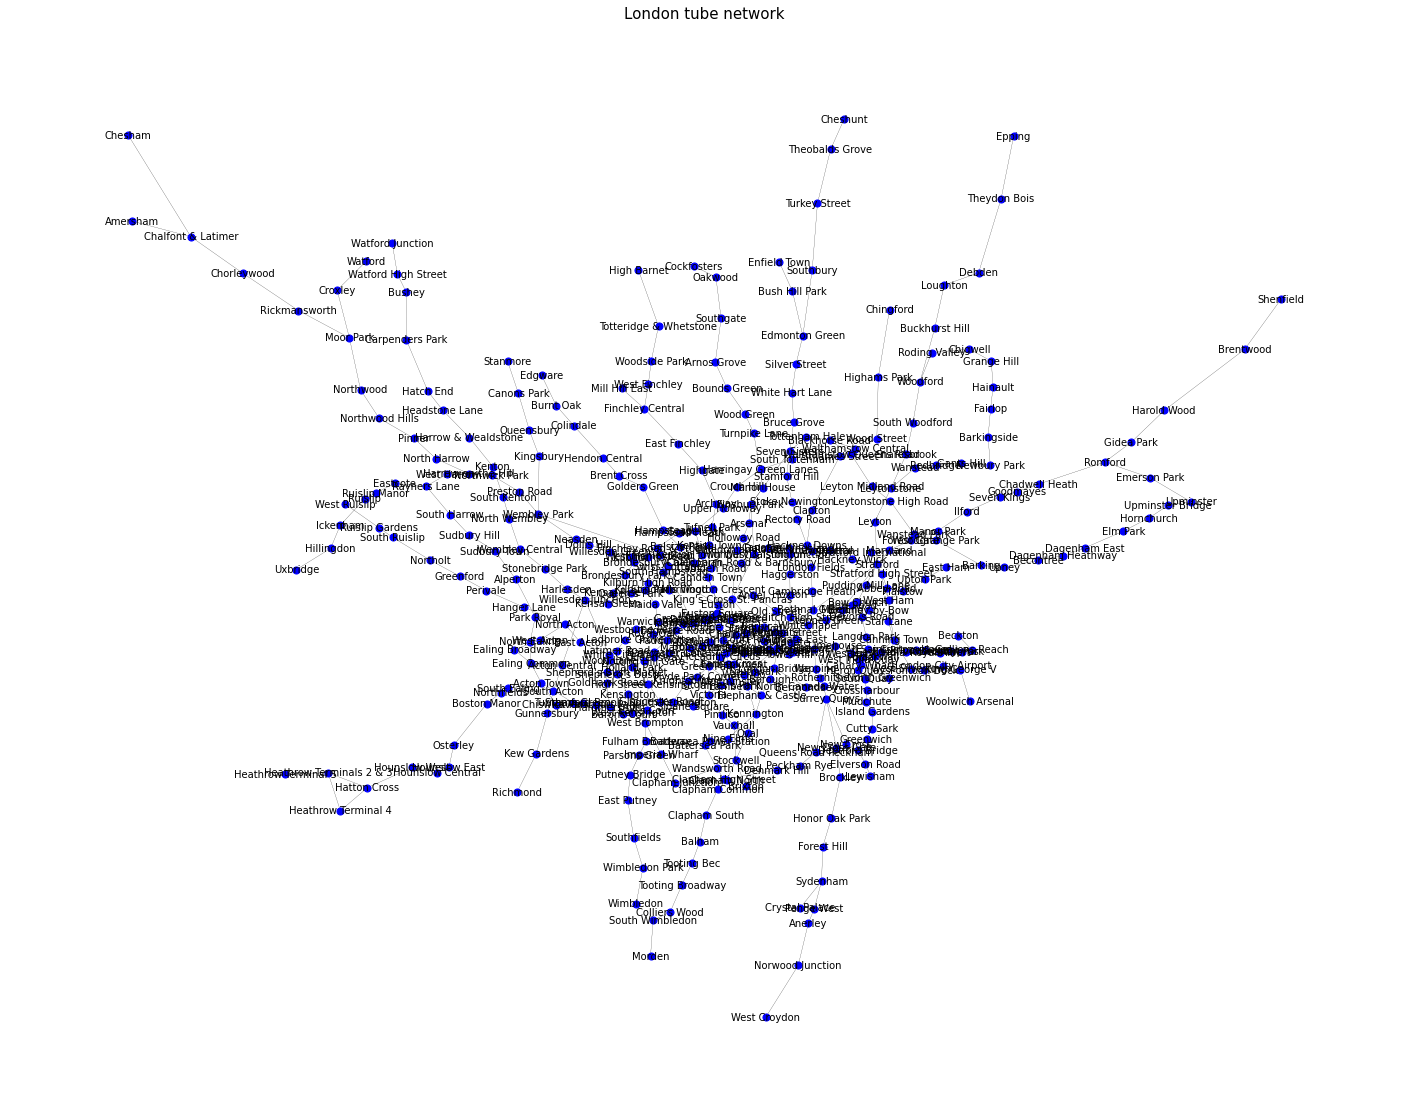

In [10]:
# plot the network to check 
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(London_network, 'coords')

nx.draw_networkx_nodes(London_network,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(London_network,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(London_network,pos,font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()


### 1.1 Centrality Measures

#### 1.1.1 Degree centrality

In [11]:
deg_london =nx.degree_centrality(London_network)
nx.set_node_attributes(London_network,dict(deg_london),'degree')

In [12]:
# To dataframe using the nodes as the index

df = pd.DataFrame(index=London_network.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(London_network, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
Canning Town,0.0150
Liverpool Street,0.0150
Earl's Court,0.0150
Oxford Circus,0.0150
Green Park,0.0150
Waterloo,0.0150


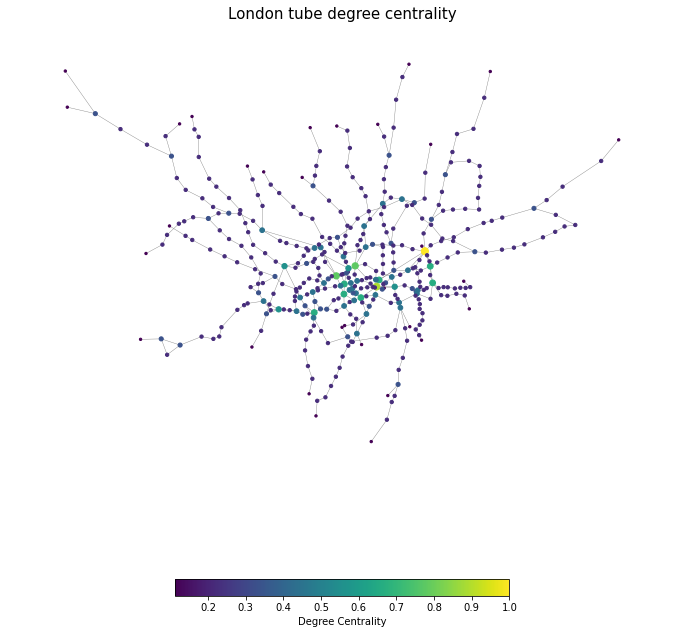

In [13]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in London_network.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in London_network.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in London_network.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(London_network, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(London_network,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### 1.1.2 Betweenness Centrality

In [14]:
bet_london=nx.betweenness_centrality(London_network,normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(London_network,bet_london,'betweenness')

In [15]:
# To dataframe using the nodes as the index
df1 = pd.DataFrame(index=London_network.nodes())
df1['betweenness'] = pd.Series(nx.get_node_attributes(London_network, 'betweenness'))

df_sorted1 = df1.sort_values(["betweenness"], ascending=False)
df_sorted1[0:10]

,betweenness
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


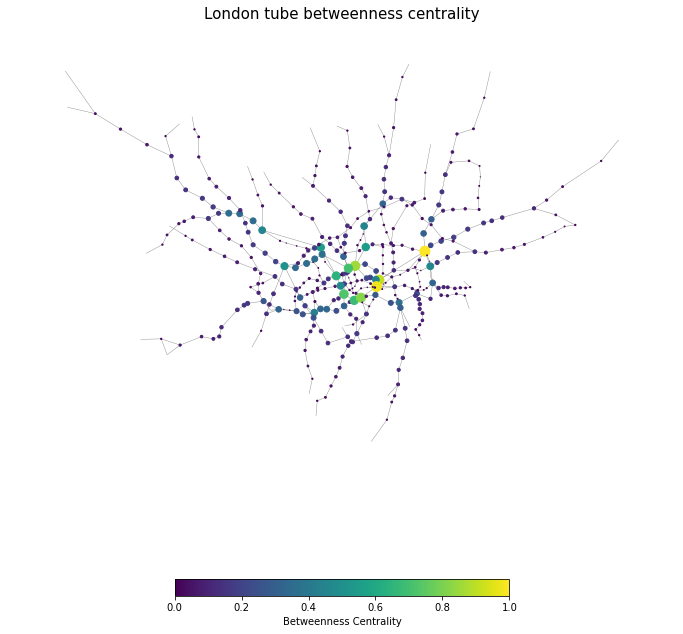

In [16]:
# Lets set colour and size of nodes according to betweenness values
betweenness_values=[(i[1]['betweenness']) for i in London_network.nodes(data=True)]

bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in London_network.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values))*100 for i in London_network.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(London_network, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(London_network,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

#### 1.1.3 Closeness Centrality

In [17]:
clos=nx.closeness_centrality(London_network)
# We can add these values to the nodes attributes:
nx.set_node_attributes(London_network,clos,'closeness')

# To ataframe using the nodes as the index
df2 = pd.DataFrame(index=London_network.nodes())
df2['closeness'] = pd.Series(nx.get_node_attributes(London_network, 'closeness'))

df_sorted2 = df2.sort_values(["closeness"], ascending=False)
df_sorted2[0:10]

,closeness
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Angel,0.110742
Farringdon,0.110742
Moorgate,0.110314


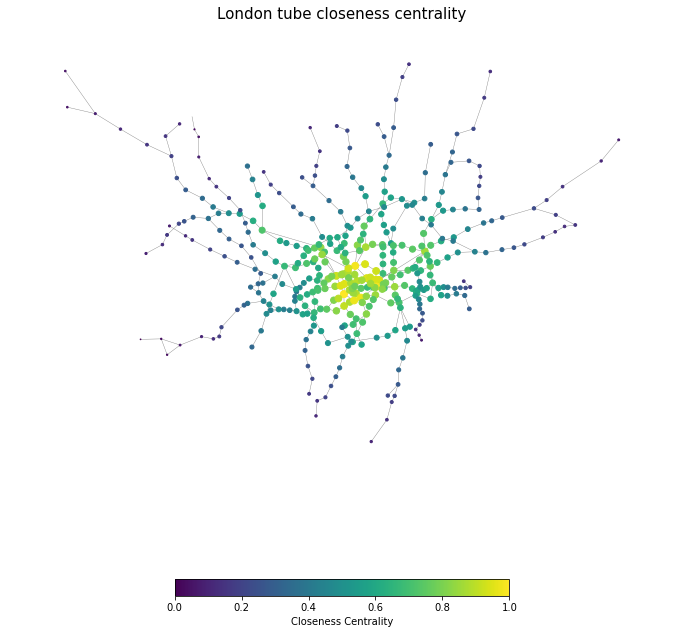

In [18]:
# Lets set color and width of nodes according to the closeness values

clos_val=[(i[1]['closeness']) for i in London_network.nodes(data=True)]

closs_color=[(i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val)) for i in London_network.nodes(data=True)]
closs_size=[((i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val))*50) for i in London_network.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(London_network, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(London_network,
        pos = pos,
        node_color= closs_color,
        node_size= closs_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality",fontsize=15)
plt.show()

### 1.3 Non-sequential

#### Largest connected component (LCC)

#### Degree centrality

In [19]:
LCC=London_network.copy()
print(nx.info(LCC))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/1457807972.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(LCC))


In [20]:
Dvalues_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
Dsorted_ten=[e for e,v in Dvalues_sorted[:10]]
Dsorted_ten

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'Liverpool Street',
 'West Ham',
 'Canning Town',
 'Green Park',
 'Oxford Circus',
 "Earl's Court"]

In [21]:
# Top10 list
D_LCC=[]
components = nx.connected_components(LCC)
largest_component = max(components, key=len)
Largest_subgraph = LCC.subgraph(largest_component)   
diameter = nx.diameter(Largest_subgraph)
D_LCC.append(Largest_subgraph.number_of_nodes())
for i in Dsorted_ten:
    LCC.remove_node(i)
    components = nx.connected_components(LCC)
    largest_component = max(components, key=len)
    Largest_subgraph = LCC.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    D_LCC.append(Largest_subgraph.number_of_nodes())
    print("removed node is", i)
    print("Components", nx.number_connected_components(LCC), ",", "LCC nodes is", Largest_subgraph.number_of_nodes(),",", "and", "LCC edge is", diameter)

removed node is Stratford
Components 3 , LCC nodes is 379 , and LCC edge is 49
removed node is Bank and Monument
Components 3 , LCC nodes is 378 , and LCC edge is 49
removed node is Baker Street
Components 3 , LCC nodes is 377 , and LCC edge is 49
removed node is King's Cross St. Pancras
Components 4 , LCC nodes is 374 , and LCC edge is 49
removed node is Liverpool Street
Components 5 , LCC nodes is 368 , and LCC edge is 49
removed node is West Ham
Components 6 , LCC nodes is 365 , and LCC edge is 53
removed node is Canning Town
Components 9 , LCC nodes is 350 , and LCC edge is 53
removed node is Green Park
Components 9 , LCC nodes is 349 , and LCC edge is 53
removed node is Oxford Circus
Components 10 , LCC nodes is 347 , and LCC edge is 53
removed node is Earl's Court
Components 10 , LCC nodes is 346 , and LCC edge is 53


In [22]:
D_LCC

[401, 379, 378, 377, 374, 368, 365, 350, 349, 347, 346]

In [23]:
# redefine size
for v in range(len(D_LCC)):
    D_LCC[v]=D_LCC[v]/401

In [24]:
D_LCC

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9326683291770573,
 0.9177057356608479,
 0.9102244389027432,
 0.8728179551122195,
 0.8703241895261845,
 0.8653366583541147,
 0.8628428927680798]

#### Closeness Centrality

In [25]:
LCC_C=London_network.copy()
print(nx.info(LCC_C))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/3255615780.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(LCC_C))


In [26]:
Cvalues_sorted = sorted(clos.items(), key=itemgetter(1), reverse=True)
Csorted_ten=[e for e,v in Cvalues_sorted[:10]]
Csorted_ten

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [27]:
C_LCC=[]
components = nx.connected_components(LCC_C)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
 # Create a "subgraph" of the largest component
Largest_subgraph = LCC_C.subgraph(largest_component)   
diameter = nx.diameter(Largest_subgraph)
C_LCC.append(Largest_subgraph.number_of_nodes())

for i in Csorted_ten:
    LCC_C.remove_node(i)
    # Get the list of components:
    components = nx.connected_components(LCC_C)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = LCC_C.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    C_LCC.append(Largest_subgraph.number_of_nodes())
    print("Components", nx.number_connected_components(LCC_C), ",", "LCC nodes is", Largest_subgraph.number_of_nodes(),",", "and", "LCC edge is", diameter)

Components 1 , LCC nodes is 400 , and LCC edge is 36
Components 1 , LCC nodes is 399 , and LCC edge is 38
Components 1 , LCC nodes is 398 , and LCC edge is 42
Components 1 , LCC nodes is 397 , and LCC edge is 42
Components 1 , LCC nodes is 396 , and LCC edge is 42
Components 1 , LCC nodes is 395 , and LCC edge is 45
Components 1 , LCC nodes is 394 , and LCC edge is 45
Components 1 , LCC nodes is 393 , and LCC edge is 45
Components 1 , LCC nodes is 392 , and LCC edge is 45
Components 3 , LCC nodes is 389 , and LCC edge is 45


In [28]:
C_LCC

[401, 400, 399, 398, 397, 396, 395, 394, 393, 392, 389]

In [29]:
for v in range(len(C_LCC)):
    C_LCC[v]=C_LCC[v]/401

In [30]:
C_LCC

[1.0,
 0.9975062344139651,
 0.9950124688279302,
 0.9925187032418953,
 0.9900249376558603,
 0.9875311720698254,
 0.9850374064837906,
 0.9825436408977556,
 0.9800498753117207,
 0.9775561097256857,
 0.970074812967581]

#### Betweeness Centrality

In [31]:
LCC_B=London_network.copy()
print(nx.info(LCC_B))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/3002311964.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(LCC_B))


In [32]:
Bvalues_sorted = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
Bsorted_ten=[e for e,v in Bvalues_sorted[:10]]
Bsorted_ten

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [33]:
# Top10 list
B_LCC=[]
components = nx.connected_components(LCC_B)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = LCC_B.subgraph(largest_component)   
diameter = nx.diameter(Largest_subgraph)
B_LCC.append(Largest_subgraph.number_of_nodes())
for i in Bsorted_ten:
    # Get the list of components:
    LCC_B.remove_node(i)
    components = nx.connected_components(LCC_B)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = LCC_B.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    B_LCC.append(Largest_subgraph.number_of_nodes())
    print("Components", nx.number_connected_components(LCC_B), ",", "LCC nodes is", Largest_subgraph.number_of_nodes(),",", "and", "LCC edge is", diameter)

Components 3 , LCC nodes is 379 , and LCC edge is 49
Components 3 , LCC nodes is 378 , and LCC edge is 49
Components 3 , LCC nodes is 377 , and LCC edge is 49
Components 4 , LCC nodes is 371 , and LCC edge is 49
Components 4 , LCC nodes is 370 , and LCC edge is 49
Components 4 , LCC nodes is 369 , and LCC edge is 49
Components 5 , LCC nodes is 346 , and LCC edge is 49
Components 5 , LCC nodes is 345 , and LCC edge is 49
Components 6 , LCC nodes is 342 , and LCC edge is 49
Components 7 , LCC nodes is 339 , and LCC edge is 49


In [34]:
B_LCC

[401, 379, 378, 377, 371, 370, 369, 346, 345, 342, 339]

In [35]:
for v in range(len(B_LCC)):
    B_LCC[v]=B_LCC[v]/401

In [36]:
B_LCC

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9251870324189526,
 0.9226932668329177,
 0.9201995012468828,
 0.8628428927680798,
 0.8603491271820449,
 0.8528678304239401,
 0.8453865336658354]

#### Global Efficiency(GF)

#### Degree Centrality

In [37]:
D_EFF=London_network.copy()
print(nx.info(D_EFF))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/3558570812.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(D_EFF))


In [38]:
# The original efficiency
print(global_efficiency(D_EFF))

0.10125619359722401


In [39]:
EFF_D=[]
EFF_D.append(global_efficiency(D_EFF))
for i in Dsorted_ten:
    D_EFF.remove_node(i)
    EFF_D.append( global_efficiency(D_EFF))
EFF_D

[0.10125619359722401,
 0.08891736066511763,
 0.0858616444874327,
 0.08203328759057998,
 0.07570039409751328,
 0.07390298386351571,
 0.07129761305770417,
 0.06726361796294883,
 0.0662845908576426,
 0.06522085201230449,
 0.06356597095171217]

#### Closeness centrality

In [40]:
C_EFF=London_network.copy()
print(nx.info(C_EFF))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/2359260615.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(C_EFF))


In [41]:
print(global_efficiency(C_EFF))

0.10125619359722401


In [42]:
EFF_C=[]
EFF_C.append(global_efficiency(C_EFF))
for i in Csorted_ten:
    C_EFF.remove_node(i)
    EFF_C.append(global_efficiency(C_EFF))

In [43]:
EFF_C

[0.10125619359722401,
 0.09918991960789761,
 0.09487232544792838,
 0.08793385149142335,
 0.08737164566978205,
 0.08485943799790648,
 0.08278135073143035,
 0.08258086417014003,
 0.08260040537397424,
 0.08262233108952198,
 0.08166991436768938]

#### Betweeness Centrality

In [44]:
B_EFF=London_network.copy()
print(nx.info(B_EFF))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/1429061785.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(B_EFF))


In [45]:
print(global_efficiency(B_EFF))

0.10125619359722401


In [46]:
EFF_B=[]
EFF_B.append(global_efficiency(B_EFF))
for i in Bsorted_ten:
    B_EFF.remove_node(i)
    EFF_B.append(global_efficiency(B_EFF))

In [47]:
EFF_B

[0.10125619359722401,
 0.08891736066511763,
 0.0858616444874327,
 0.08496349266424735,
 0.07849775440714298,
 0.07594226578366664,
 0.07415154167649028,
 0.06820564659789043,
 0.06765950327361275,
 0.06470005805302101,
 0.06313903700826687]

#### 1.4 Sequential

#### Largest connected component (LCC)

#### Degree Centrality

In [48]:
LCC1=London_network.copy()
print(nx.info(LCC1))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/3103992439.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(LCC1))


In [49]:
deg_london2 =nx.degree_centrality(LCC1)
Dvalues_sorted1 = sorted(deg_london2.items(), key=itemgetter(1), reverse=True)
Dsorted_ten1=[e for e, v in Dvalues_sorted1[:10]]
components = nx.connected_components(LCC1)
largest_component = max(components, key=len)


In [50]:
# Create a "subgraph" of the largest component
Largest_subgraph = LCC1.subgraph(largest_component)
LCC_D1=[]
LCC_D1.append(Largest_subgraph.number_of_nodes())

for i in Dsorted_ten1:
    i=Dsorted_ten1[0]
    LCC1.remove_node(i)
    #print("removed node is",  i)
    # Get the list of components:
    components = nx.connected_components(LCC1)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = LCC1.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    LCC_D1.append(Largest_subgraph.number_of_nodes())
    #realculate degree centrality
    deg_london2 =nx.degree_centrality(LCC1)
    Dvalues_sorted1 = sorted(deg_london2.items(), key=itemgetter(1), reverse=True)
    Dsorted_ten1=[e for e,v in Dvalues_sorted1[:10]]

In [51]:
LCC_D1

[401, 379, 378, 377, 374, 360, 359, 358, 356, 355, 354]

In [52]:
for v in range(len(LCC_D1)):
    LCC_D1[v]=LCC_D1[v]/401


In [53]:
LCC_D1

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9326683291770573,
 0.8977556109725686,
 0.8952618453865336,
 0.8927680798004988,
 0.8877805486284289,
 0.885286783042394,
 0.8827930174563591]

#### Closeness Centrality

In [54]:
C_LCC1=London_network.copy()
print(nx.info(C_LCC1))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/168914983.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(C_LCC1))


In [55]:
close_london2 =nx.closeness_centrality(C_LCC1)
Cvalues_sorted1 = sorted(close_london2.items(), key=itemgetter(1), reverse=True)
Csorted_ten1=[e for e, v in Cvalues_sorted1[:10]]
components = nx.connected_components(C_LCC1)
largest_component = max(components, key=len)

In [56]:
Largest_subgraph = C_LCC1.subgraph(largest_component)
LCC_C1=[]

LCC_C1.append(Largest_subgraph.number_of_nodes())
for i in Csorted_ten1:
    i=Csorted_ten1[0]
    C_LCC1.remove_node(i)
    # Get the list of components:
    components = nx.connected_components(C_LCC1)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = C_LCC1.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    LCC_C1.append(Largest_subgraph.number_of_nodes())
    #print("removed node is",  i)
    #realculate degree centrality
    close_london2 =nx.closeness_centrality(C_LCC1)
    Cvalues_sorted1 = sorted(close_london2.items(), key=itemgetter(1), reverse=True)
    Csorted_ten1=[e for e, v in Cvalues_sorted1[:10]]

In [57]:
LCC_C1

[401, 400, 399, 398, 397, 396, 226, 226, 225, 195, 194]

In [58]:
for v in range(len(LCC_C1)):
    LCC_C1[v]=LCC_C1[v]/401

In [59]:
LCC_C1

[1.0,
 0.9975062344139651,
 0.9950124688279302,
 0.9925187032418953,
 0.9900249376558603,
 0.9875311720698254,
 0.5635910224438903,
 0.5635910224438903,
 0.5610972568578554,
 0.486284289276808,
 0.4837905236907731]

#### Betweeness Centrality

In [60]:
B_LCC1=London_network.copy()
print(nx.info(B_LCC1))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/405965506.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(B_LCC1))


In [61]:
bet_london2 =nx.betweenness_centrality(B_LCC1)
Bvalues_sorted1 = sorted(bet_london2.items(), key=itemgetter(1), reverse=True)
Bsorted_ten1=[e for e, v in Bvalues_sorted1[:10]]
components = nx.connected_components(B_LCC1)
largest_component = max(components, key=len)

In [62]:
Largest_subgraph = B_LCC1.subgraph(largest_component)
LCC_B1=[]
LCC_B1.append(Largest_subgraph.number_of_nodes())
for i in Bsorted_ten1:
    i=Bsorted_ten1[0]
    B_LCC1.remove_node(i)
    #print("removed node is",  i)
    # Get the list of components:
    components = nx.connected_components(B_LCC1)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = B_LCC1.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    LCC_B1.append(Largest_subgraph.number_of_nodes())
    #realculate degree centrality
    bet_london2 =nx.betweenness_centrality(B_LCC1)
    Bvalues_sorted1 = sorted(bet_london2.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten1=[e for e,v in Bvalues_sorted1[:10]]

In [63]:
LCC_B1

[401, 379, 378, 377, 376, 375, 227, 226, 196, 173, 170]

In [64]:
for v in range(len(LCC_B1)):
    LCC_B1[v]=LCC_B1[v]/401

In [65]:
LCC_B1

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9376558603491272,
 0.9351620947630923,
 0.5660847880299252,
 0.5635910224438903,
 0.48877805486284287,
 0.4314214463840399,
 0.4239401496259352]

#### Global Efficiency (GF)

#### Degree Centrality

In [66]:
D_EFF1=London_network.copy()
print(nx.info(D_EFF1))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/831263135.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(D_EFF1))


In [67]:
print(global_efficiency(D_EFF1))

0.10125619359722401


In [68]:
deg_london3 =nx.degree_centrality(D_EFF1)
Dvalues_sorted2 = sorted(deg_london3.items(), key=itemgetter(1), reverse=True)
Dsorted_ten2=[e for e, v in Dvalues_sorted2[:10]]
EFF_D1=[]
EFF_D1.append(global_efficiency(D_EFF1))
for i in Dsorted_ten2:
    D_EFF1.remove_node(i)
    i=Dsorted_ten2[0]
    GE=global_efficiency(D_EFF1)
    deg_london3 =nx.degree_centrality(D_EFF1)
    Dvalues_sorted2 = sorted(deg_london3.items(), key=itemgetter(1), reverse=True)
    Dsorted_ten2=[e for e, v in Dvalues_sorted2[:10]]
    EFF_D1.append(GE)

In [69]:
EFF_D1

[0.10125619359722401,
 0.08891736066511763,
 0.0858616444874327,
 0.08203328759057998,
 0.07570039409751328,
 0.07390298386351571,
 0.07129761305770417,
 0.06726361796294883,
 0.0662845908576426,
 0.06522085201230449,
 0.06356597095171217]

#### Closeness Centrality

In [70]:
C_EFF1=London_network.copy()
print(nx.info(C_EFF1))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/809954687.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(C_EFF1))


In [71]:
print(global_efficiency(C_EFF1))

0.10125619359722401


In [72]:
close_london3 =nx.closeness_centrality(C_EFF1)
Cvalues_sorted2 = sorted(close_london3.items(), key=itemgetter(1), reverse=True)
Csorted_ten2=[e for e, v in Cvalues_sorted2[:10]]
EFF_C1=[]
EFF_C1.append(global_efficiency(C_EFF1))
for i in Csorted_ten2:
    i=Csorted_ten2[0]
    C_EFF1.remove_node(i)
    CE=global_efficiency(C_EFF1)
    close_london3 =nx.closeness_centrality(C_EFF1)
    Cvalues_sorted2 = sorted(close_london3.items(), key=itemgetter(1), reverse=True)
    Csorted_ten2=[e for e, v in Cvalues_sorted2[:10]]
    EFF_C1.append(CE)

In [73]:
EFF_C1

[0.10125619359722401,
 0.09918991960789761,
 0.0944347502556747,
 0.0918164806018479,
 0.08542563066912973,
 0.08054424756502723,
 0.05810104159173005,
 0.051883620553389305,
 0.050350000936268284,
 0.044394587271025666,
 0.042957710613368255]

#### Betweenness Centrality

In [74]:
B_EFF1=London_network.copy()
print(nx.info(B_EFF1))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/2576764252.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(B_EFF1))


In [75]:
print(global_efficiency(B_EFF1))

0.10125619359722401


In [76]:
bet_london3 =nx.betweenness_centrality(B_EFF1)
Bvalues_sorted2 = sorted(bet_london3.items(), key=itemgetter(1), reverse=True)
Bsorted_ten2=[e for e, v in Bvalues_sorted2[:10]]
EFF_B1=[]
EFF_B1.append(global_efficiency(B_EFF1))
for i in Bsorted_ten2:
    B_EFF1.remove_node(i)
    i=Bsorted_ten2[0]
    BE=global_efficiency(B_EFF1)
    bet_london3 =nx.betweenness_centrality(B_EFF1)
    Bvalues_sorted2 = sorted(bet_london3.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten2=[e for e, v in Bvalues_sorted2[:10]]
    EFF_B1.append(BE)

In [77]:
EFF_B1

[0.10125619359722401,
 0.08891736066511763,
 0.0858616444874327,
 0.08496349266424735,
 0.07849775440714298,
 0.07594226578366664,
 0.07415154167649028,
 0.06820564659789043,
 0.06765950327361275,
 0.06470005805302101,
 0.06313903700826687]

#### 1.5 Vis

#### LCC

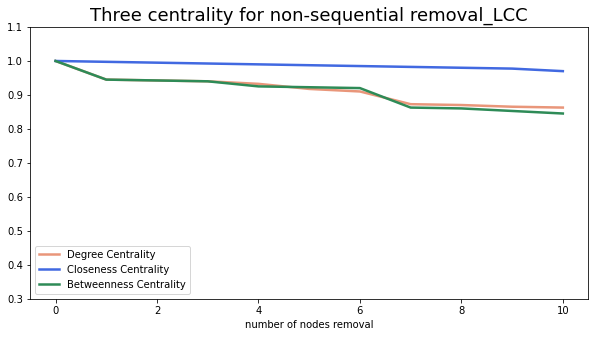

In [78]:
plt.figure(figsize=(10,5))
plt.title("Three centrality for non-sequential removal_LCC",fontsize=18)

#Degree Centrality
sns.lineplot(data=D_LCC, label="Degree Centrality", color="darksalmon",linewidth=2.5)

#Closenness Centrality
sns.lineplot(data=C_LCC, label="Closeness Centrality", color="royalblue",linewidth=2.5)

#Betweenness Centrality
sns.lineplot(data=B_LCC, label="Betweenness Centrality", color="seagreen",linewidth=2.5)

#Regulating the range of vertical axes
plt.ylim([0.3, 1.1])

plt.xlabel("number of nodes removal")
plt.savefig('LCC1.png')
plt.show()

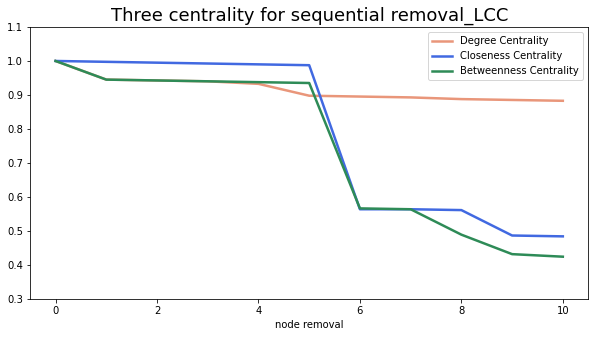

In [79]:
plt.figure(figsize=(10,5))

plt.title("Three centrality for sequential removal_LCC",fontsize=18)

sns.lineplot(data=LCC_D1, label="Degree Centrality", color="darksalmon",linewidth=2.5)

sns.lineplot(data=LCC_C1, label="Closeness Centrality", color="royalblue",linewidth=2.5)

sns.lineplot(data=LCC_B1, label="Betweenness Centrality", color="seagreen",linewidth=2.5)

plt.ylim([0.3, 1.1])

plt.xlabel("node removal")
plt.savefig('LCC2.png')
plt.show()

#### GF

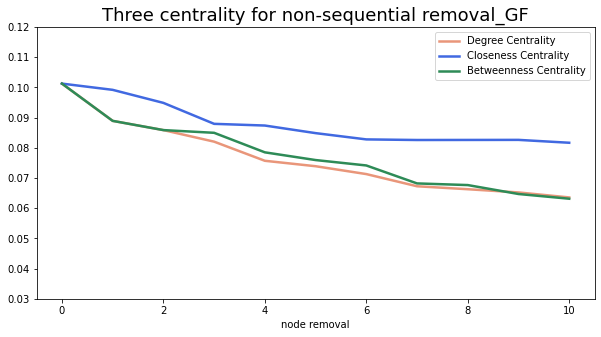

In [80]:
plt.figure(figsize=(10,5))

plt.title("Three centrality for non-sequential removal_GF",fontsize=18)

sns.lineplot(data=EFF_D, label="Degree Centrality", color="darksalmon",linewidth=2.5)

sns.lineplot(data=EFF_C, label="Closeness Centrality", color="royalblue",linewidth=2.5)

sns.lineplot(data=EFF_B, label="Betweenness Centrality", color="seagreen",linewidth=2.5)

plt.ylim([0.03, 0.12])

plt.xlabel("node removal")
plt.savefig('GF1.png')
plt.show()

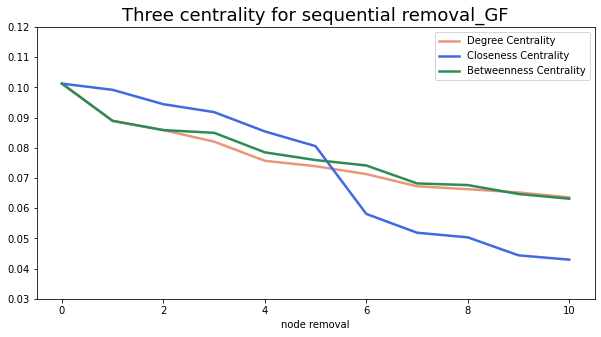

In [81]:
plt.figure(figsize=(10,5))

plt.title("Three centrality for sequential removal_GF",fontsize=18)

sns.lineplot(data=EFF_D1, label="Degree Centrality", color="darksalmon",linewidth=2.5)

sns.lineplot(data=EFF_C1, label="Closeness Centrality", color="royalblue",linewidth=2.5)

sns.lineplot(data=EFF_B1, label="Betweenness Centrality", color="seagreen",linewidth=2.5)

plt.ylim([0.03, 0.12])

plt.xlabel("node removal")
plt.savefig('GF2.png')
plt.show()

## 2. Weighted Network

In [82]:
c_w={}
for e1, e2, flow in London_network.edges(data='flows'):
    if flow ==0:
        flow = 0.000000001
        print(flow)
    else:
        flow==flow
    flow=1/flow
    c_w[e1,e2] =flow
nx.set_edge_attributes(London_network,c_w,'flows_c')

1e-09
1e-09
1e-09


In [83]:
bet_london_w =nx.betweenness_centrality(London_network, weight='flows_c',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(London_network,bet_london_w,'betweenness_w')

# To dataframe using the nodes as the index
df1_w = pd.DataFrame(index=London_network.nodes())
df1_w['betweenness_w'] = pd.Series(nx.get_node_attributes(London_network, 'betweenness_w'))

df_sorted1_w = df1_w.sort_values(["betweenness_w"], ascending=False)
df_sorted1_w[0:10]

,betweenness_w
Green Park,45372.0
Bank and Monument,36303.0
Waterloo,30725.0
Westminster,28723.0
Liverpool Street,27365.0
Stratford,26015.0
Euston,22791.0
Oxford Circus,21300.0
Victoria,20776.0
Bond Street,20132.0


#### Weighted GF

In [84]:
def global_efficiency_w(G,weight):
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        lengths = nx.all_pairs_dijkstra_path_length(G,weight=weight)
        g_eff = 0
        for source, targets in lengths:
            for target, distance in targets.items():
                if distance > 0:
                    g_eff += 1 / distance
        g_eff /= denom
        #g_eff = sum(1 / d for s, tgts in lengths
                          #for t, d in tgts.items() if d > 0) / denom
    else:
        g_eff = 0
    # TODO This can be made more efficient by computing all pairs shortest
    # path lengths in parallel.
    return g_eff

In [85]:
# weighted removal
network_2_3=London_network.copy()

network_2_3_1 =nx.betweenness_centrality(network_2_3, weight='flows_c',normalized=False)
Bvalues_sorted4 = sorted(network_2_3_1.items(), key=itemgetter(1), reverse=True)
Bsorted_ten4=[e for e, v in Bvalues_sorted4[:3]]
GF_B1=[]
GF_B1.append(global_efficiency_w(network_2_3,'flows_c'))
for i in Bsorted_ten4:
    network_2_3.remove_node(i)
    i=Bsorted_ten4[0]
    BE=(global_efficiency_w(network_2_3,'flows_c'))
    network_2_3_1 =nx.betweenness_centrality(network_2_3, weight='flows_c',normalized=False)
    Bvalues_sorted4 = sorted(network_2_3_1.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten4=[e for e, v in Bvalues_sorted4[:3]]
    GF_B1.append(BE)

In [86]:
GF_B1

[2647.6226316757316,
 2377.4479923591275,
 2053.7337643354003,
 1985.4119724690365]

In [87]:
# unweighted removal
network_2_4=London_network.copy()
network_2_4_1 =nx.betweenness_centrality(network_2_4)
Bvalues_sorted5 = sorted(network_2_4_1.items(), key=itemgetter(1), reverse=True)
Bsorted_ten5=[e for e, v in Bvalues_sorted5[:3]]
GF_B2=[]
GF_B2.append(global_efficiency(network_2_4))
for i in Bsorted_ten5:
    network_2_4.remove_node(i)
    i=Bsorted_ten5[0]
    BE=global_efficiency(network_2_4)
    network_2_4_1 =nx.betweenness_centrality(network_2_4)
    Bvalues_sorted5 = sorted(network_2_4_1.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten5=[e for e, v in Bvalues_sorted5[:3]]
    GF_B2.append(BE)

In [88]:
GF_B2

[0.10125619359722401,
 0.08891736066511763,
 0.0858616444874327,
 0.08496349266424735]

#### Weighted Clustering coef

In [89]:
# unweighted
B_cluster1=London_network.copy()
Bet_cluster =nx.betweenness_centrality(B_cluster1)
Bvalues_sorted3 = sorted(Bet_cluster.items(), key=itemgetter(1), reverse=True)
Bsorted_ten3=[e for e, v in Bvalues_sorted3[:3]]

In [90]:
B_coeff1=[]
C=nx.clustering(B_cluster1, weight="flows")
C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
C_avg = sum([a[1] for a in C]) / len(C)
B_coeff1.append(C_avg)
for i in Bsorted_ten3:
    i=Bsorted_ten3[0]
    B_cluster1.remove_node(i)
    C=nx.clustering(B_cluster1, weight="flows")
    C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
    C_avg = sum([a[1] for a in C]) / len(C)
    B_coeff1.append(C_avg)
    Bet_cluster =nx.betweenness_centrality(B_cluster1)
    Bvalues_sorted3 = sorted(Bet_cluster.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten3=[e for e, v in Bvalues_sorted3[:3]]

In [91]:
B_coeff1

[0.0015443471817562946,
 0.0015797015115559484,
 0.0015878989301731491,
 0.0018233511187899034]

In [92]:
# weighted
B_cluster2=London_network.copy()
Bet_cluster2 =nx.betweenness_centrality(B_cluster2, weight='flows_c',normalized=False)
Bvalues_sorted6 = sorted(Bet_cluster2.items(), key=itemgetter(1), reverse=True)
Bsorted_ten6=[e for e, v in Bvalues_sorted6[:3]]

In [93]:
print(nx.info(B_cluster2))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_676/707703949.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(B_cluster2))


In [94]:
B_coeff2=[]
C2=nx.clustering(B_cluster2, weight="flows")
C2 = sorted(C2.items(), key=lambda pair: pair[1], reverse=True)
C_avg2 = sum([a[1] for a in C2]) / len(C2)
B_coeff2.append(C_avg2)
for i in Bsorted_ten6:
    i=Bsorted_ten6[0]
    B_cluster2.remove_node(i)
    C2=nx.clustering(B_cluster2, weight="flows")
    C2 = sorted(C2.items(), key=lambda pair: pair[1], reverse=True)
    C_avg2 = sum([a[1] for a in C2]) / len(C2)
    B_coeff2.append(C_avg2)
    Bet_cluster2 =nx.betweenness_centrality(B_cluster2, weight='flows_c',normalized=False)
    Bvalues_sorted6 = sorted(Bet_cluster2.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten6=[e for e, v in Bvalues_sorted6[:3]]

In [95]:
B_coeff2

[0.0015443471817562946,
 0.001351151526867911,
 0.0013587761385059434,
 0.0013554276827442942]

## 3. Spatial Interaction Models

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [97]:
cdatasub = pd.read_csv('london_flows_2.csv')

In [98]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [99]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance
0,Mansion House,Cannon Street,1,516,4698,248.178706
1,Cannon Street,Mansion House,17,3874,7815,248.178706
2,Poplar,West India Quay,3,2271,400,260.862574
3,West India Quay,Poplar,0,162,1301,260.862574
4,Canary Wharf,West India Quay,14,14632,400,327.244216
...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550
61409,Morden,Chesham,0,8035,243,59183.467370
61410,Gants Hill,Chesham,0,5243,243,60341.935680
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740


In [100]:
cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [101]:
#log variables
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x])
    log_x_vars.append(f"log_{x}")

In [102]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub = cdatasub.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub = cdatasub.merge(D_j, on = "station_destination", how = "left" )

In [103]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400
...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,1132
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,243
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,243
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,498


In [104]:
cdatasub.replace([np.inf, -np.inf], np.nan,inplace = True)
cdatasub=cdatasub.dropna()
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400
...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,1132
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,243
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,243
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,498


### OLS

In [105]:
cdatasub_1=cdatasub.copy()

In [106]:
formula1 = 'flows ~ (log_population + log_jobs + log_distance-1)'
formula1_1='flows ~ (log_population + log_jobs + distance-1)'
formula2 = 'flows ~ station_origin + log_jobs + log_distance-1'
formula2_1='flows ~ station_origin + log_jobs + distance-1'
formula3 = 'flows ~ station_destination + log_population + log_distance-1'
formula3_1='flows ~ station_destination + log_population + distance-1'
formula4 = 'flows ~ station_destination + station_origin + log_distance-1'
formula4_1='flows ~ station_destination + station_origin + distance-1'

formulas=formula1,formula1_1,formula2,formula2_1,formula3,formula3_1,formula4,formula4_1

In [107]:
resultr=[]
resultm=[]
for formula in formulas:
    result=smf.glm(formula = formula, data=cdatasub_1, family=sm.families.Poisson()).fit()
    predictions1 = result.get_prediction()
    predictions1_summary_frame = predictions1.summary_frame()
    cdatasub_1["result"] = round(predictions1_summary_frame["mean"],0)
    r1=CalcRSquared(cdatasub_1["flows"], cdatasub_1["result"])
    r2=CalcRMSE(cdatasub_1["flows"], cdatasub_1["result"])
    resultr.append(r1)
    resultm.append(r2)

In [108]:
resultr

[0.24643850340413348,
 0.17346185794608537,
 0.38827639501786326,
 0.4680648443542883,
 0.34993238409399136,
 0.39995419556248407,
 0.40768532292960646,
 0.4978427414632328]

In [109]:
resultm

[114.26, 120.843, 102.893, 96.263, 106.013, 102.168, 101.335, 93.401]

In [110]:
resultr1=pd.DataFrame({'Rsquare':resultr})
resultr1['model']=["unconstrained_pl","unconstrained_ne","production_pl","production_ne","attraction_pl","attraction_ne", "doubly_pl","doubly_ne"]
resultr1

,Rsquare,model
0,0.246439,unconstrained_pl
1,0.173462,unconstrained_ne
2,0.388276,production_pl
3,0.468065,production_ne
4,0.349932,attraction_pl
5,0.399954,attraction_ne
6,0.407685,doubly_pl
7,0.497843,doubly_ne


In [111]:
resultr2=pd.DataFrame({'RMSE':resultm})
resultr2['model']=["unconstrained_pl","unconstrained_ne","production_pl","production_ne","attraction_pl","attraction_ne", "doubly_pl","doubly_ne"]
resultr2

,RMSE,model
0,114.260,unconstrained_pl
1,120.843,unconstrained_ne
2,102.893,production_pl
3,96.263,production_ne
4,106.013,attraction_pl
5,102.168,attraction_ne
6,101.335,doubly_pl
7,93.401,doubly_ne


#### doubly-con

In [112]:
dbl_form1 = 'flows ~ station_destination + station_origin + distance'
#run a doubly constrained sim
doubSim1 = smf.glm(formula = dbl_form1, data=cdatasub, family=sm.families.Poisson()).fit()

In [113]:
print(doubSim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Thu, 04 May 2023   Deviance:                   1.5299e+06
Time:                        03:41:33   Pearson chi2:                 2.02e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [114]:
cdatasub["doubsimfitted1"] = np.round(doubSim1.mu)
#here's the matrix
cdatasubmat1 = cdatasub.pivot_table(values ="doubsimfitted1", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,603.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1221.0
Acton Town,NaN,NaN,NaN,11.0,10.0,NaN,17.0,0.0,NaN,12.0,...,40.0,4.0,2.0,19.0,NaN,0.0,NaN,1.0,NaN,3752.0
Aldgate,NaN,NaN,1.0,NaN,32.0,NaN,NaN,0.0,NaN,23.0,...,7.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2883.0
Aldgate East,NaN,NaN,2.0,38.0,NaN,NaN,0.0,0.0,NaN,24.0,...,7.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,38.0,44.0,NaN,NaN,NaN,NaN,25.0,...,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,2.0,17.0,15.0,NaN,0.0,NaN,NaN,25.0,...,10.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [115]:
CalcRSquared(cdatasub["flows"],cdatasub["doubsimfitted1"])

0.4978427414632328

In [116]:
CalcRMSE(cdatasub["flows"],cdatasub["doubsimfitted1"])

93.401

In [117]:
def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

In [118]:
alpha_i = doubSim1.params[0:-2]
gamma = doubSim1.params[-2]
beta = -doubSim1.params[-1]
# balancing factors
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',-beta,'exponential','Ai_exp','Bj_exp')

# predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_exp2'] = np.round(cdatasub['O_i'] * cdatasub['Ai_exp'] * cdatasub['D_j'] * cdatasub['Bj_exp'] * 
                                   np.exp(cdatasub['distance']*-beta))

pd.pivot_table(cdatasub,values='SIM_est_exp2',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,603.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,11,10,0,17,0,0,12,...,40,4,2,19,0,0,0,1,0,3752.0
Aldgate,0,0,1,0,32,0,0,0,0,23,...,7,0,3,2,0,1,0,1,0,2883.0
Aldgate East,0,0,2,38,0,0,0,0,0,24,...,7,1,3,2,0,1,0,1,0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,38,44,0,0,0,0,25,...,7,0,7,0,0,0,0,0,0,4862.0
Woodgrange Park,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,2,17,15,0,0,0,0,25,...,10,0,4,0,0,0,0,0,0,3093.0


In [119]:
alpha_i

Intercept                               1.354150
station_destination[T.Acton Central]    1.486103
station_destination[T.Acton Town]       1.440836
station_destination[T.Aldgate]          2.222441
station_destination[T.Aldgate East]     2.153787
                                          ...   
station_origin[T.Wood Lane]            -0.116995
station_origin[T.Wood Street]           2.036842
station_origin[T.Woodford]              2.502803
station_origin[T.Woodgrange Park]       1.708963
station_origin[T.Woodside Park]         1.938702
Length: 794, dtype: float64

In [120]:
gamma

3.388776344742886

In [121]:
beta

0.00015436969215719924

#### Production ne

In [122]:
formula_attr2 = 'flows ~ station_origin + log_jobs + distance-1'
prosim_p = smf.glm(formula = formula_attr2, data=cdatasub, family=sm.families.Poisson()).fit()


In [123]:
alpha_i1 = prosim_p.params[0:-2]
gamma1 = prosim_p.params[-2]
beta1 = -prosim_p.params[-1]

In [124]:
coefs = pd.DataFrame(prosim_p.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i1", "index":"coef"}, inplace = True)

to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
cdatasub = cdatasub.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdatasub.drop(columns = ["coef"], inplace = True)


/tmp/ipykernel_676/1686388309.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


In [125]:
#then once you have done this you can join them back into the dataframes
cdatasub.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i1
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698,4.0,0.000002,0.874806,4.0,-4.711688
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815,46.0,0.000002,0.915521,46.0,-2.747233
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400,10.0,0.000005,2.118110,10.0,-1.853468
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301,2.0,0.000005,2.083985,2.0,-4.489744
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400,30.0,0.000003,2.118110,30.0,-0.944164


In [126]:
cdatasub["prosimfit_p"] = np.round(prosim_p.mu)

r1=CalcRSquared(cdatasub["flows"],cdatasub["prosimfit_p"])
r2=CalcRMSE(cdatasub["flows"],cdatasub["prosimfit_p"])
print(r1,r2)

0.4680648443542883 96.263


In [127]:
cdatasub["prosimfit_p"] = round(cdatasub["prosimfit_p"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
cdatasubmat2 = cdatasub.pivot_table(values ="prosimfit_p", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat2 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3100.0


In [128]:
alpha_i1

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 398, dtype: float64

In [129]:
gamma1

0.7552215895692503

In [130]:
beta1

0.00015316619346408792

### 3.1. Scenario A

In [164]:
cdatasub_job50 = cdatasub.copy()
cdatasub_job50

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698,4.0,0.000002,0.874806,4.0,-4.711688,5.0
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815,46.0,0.000002,0.915521,46.0,-2.747233,54.0
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400,10.0,0.000005,2.118110,10.0,-1.853468,14.0
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301,2.0,0.000005,2.083985,2.0,-4.489744,2.0
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400,30.0,0.000003,2.118110,30.0,-0.944164,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,1132,0.0,0.000033,2.070728,0.0,-0.734629,0.0
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,243,0.0,0.000010,6.869364,0.0,-0.212843,0.0
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,243,0.0,0.000011,6.869364,0.0,-0.602546,0.0
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,498,0.0,0.000033,7.941496,0.0,-0.734629,0.0


In [165]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["jobs"]*0.5
    else:
        val = row["jobs"]
    return val

cdatasub_job50["scenarioA"] = cdatasub_job50.apply(new_sal, axis =1)

x_variables = ["scenarioA"]
log_x_vars = []

In [166]:
cdatasub_job50

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p,scenarioA
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698,4.0,0.000002,0.874806,4.0,-4.711688,5.0,4698.0
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815,46.0,0.000002,0.915521,46.0,-2.747233,54.0,7815.0
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400,10.0,0.000005,2.118110,10.0,-1.853468,14.0,400.0
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301,2.0,0.000005,2.083985,2.0,-4.489744,2.0,1301.0
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400,30.0,0.000003,2.118110,30.0,-0.944164,34.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,1132,0.0,0.000033,2.070728,0.0,-0.734629,0.0,1132.0
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,243,0.0,0.000010,6.869364,0.0,-0.212843,0.0,243.0
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,243,0.0,0.000011,6.869364,0.0,-0.602546,0.0,243.0
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,498,0.0,0.000033,7.941496,0.0,-0.734629,0.0,498.0


In [167]:
cdatasub_job50["scena_est"] = np.exp(cdatasub_job50["alpha_i1"]+gamma1*np.log(cdatasub_job50["scenarioA"]) - beta1*cdatasub_job50["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
#as we don't want half a person
cdatasub_job50["scena_est"] = round(cdatasub_job50["scena_est"],0)
#now we can convert the pivot table into a matrix
ScenA_est = cdatasub_job50.pivot_table(values ="scena_est", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)

#display the results
ScenA_est

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,555.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3730.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2854.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4765.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3083.0


In [169]:
cdatasub_job50

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p,scenarioA,scena_est
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698,4.0,0.000002,0.874806,4.0,-4.711688,5.0,4698.0,5.0
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815,46.0,0.000002,0.915521,46.0,-2.747233,54.0,7815.0,54.0
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400,10.0,0.000005,2.118110,10.0,-1.853468,14.0,400.0,14.0
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301,2.0,0.000005,2.083985,2.0,-4.489744,2.0,1301.0,2.0
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400,30.0,0.000003,2.118110,30.0,-0.944164,34.0,400.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,1132,0.0,0.000033,2.070728,0.0,-0.734629,0.0,1132.0,0.0
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,243,0.0,0.000010,6.869364,0.0,-0.212843,0.0,243.0,0.0
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,243,0.0,0.000011,6.869364,0.0,-0.602546,0.0,243.0,0.0
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,498,0.0,0.000033,7.941496,0.0,-0.734629,0.0,498.0,0.0


In [179]:
jobs_gamma = cdatasub_job50["jobs"]**gamma1
dist_beta = cdatasub_job50["distance"]**-beta1
#calcualte the first stage of the Ai values
cdatasub_job50["Ai1"] = jobs_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub_job50.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub_job50 = cdatasub_job50.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [180]:
cdatasub_job50

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,SIM_est_exp2,alpha_i1,prosimfit_p,scenarioA,scena_est,Ai1,A_i_x,prosimest_c,A_i_y,A_i
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,...,4.0,-4.711688,5.0,4698.0,5.0,592.572080,0.000008,2.0,0.000008,0.000008
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,...,46.0,-2.747233,54.0,7815.0,54.0,870.276421,0.000007,24.0,0.000007,0.000007
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,...,10.0,-1.853468,14.0,400.0,14.0,92.206549,0.000042,9.0,0.000042,0.000042
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,...,2.0,-4.489744,2.0,1301.0,2.0,224.698068,0.000043,2.0,0.000043,0.000043
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,...,30.0,-0.944164,34.0,400.0,34.0,92.203348,0.000007,9.0,0.000007,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,...,0.0,-0.734629,0.0,1132.0,0.0,202.116005,0.000007,1.0,0.000007,0.000007
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,...,0.0,-0.212843,0.0,243.0,0.0,63.231054,0.000007,4.0,0.000007,0.000007
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,...,0.0,-0.602546,0.0,243.0,0.0,63.230866,0.000007,2.0,0.000007,0.000007
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,...,0.0,-0.734629,0.0,498.0,0.0,108.710948,0.000007,1.0,0.000007,0.000007


In [181]:
cdatasub_job50["prosimest_c"] = cdatasub_job50["A_i"]*cdatasub_job50["O_i"]*jobs_gamma*dist_beta

cdatasub_job50["prosimest_c"] = round(cdatasub_job50["prosimest_c"])

cdatasub_job50[["prosimfit_p", "prosimest_c"]]

,prosimfit_p,prosimest_c
0,5.0,2.0
1,54.0,24.0
2,14.0,9.0
3,2.0,2.0
4,34.0,9.0
...,...,...
61408,0.0,1.0
61409,0.0,4.0
61410,0.0,2.0
61411,0.0,1.0


In [182]:
jobs2_gamma = cdatasub_job50["scenarioA"]**gamma1
#calcualte the first stage of the Ai values
cdatasub_job50["Ai1"] = jobs2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub_job50.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub_job50 = cdatasub_job50.merge(A_i, left_on="station_origin", right_index=True, how="left")
#to check everything works, recreate the original estimates

In [183]:
cdatasub_job50["scenA_est_1"] = cdatasub_job50["A_i2"]*cdatasub_job50["O_i"]*jobs2_gamma*dist_beta

cdatasub_job50["scenA_est_1"] = round(cdatasub_job50["scenA_est_1"])

ScenA_1 = cdatasub_job50.pivot_table(values ="scenA_est_1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ScenA_1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,24.0,24.0,NaN,4.0,2.0,NaN,25.0,...,21.0,3.0,9.0,7.0,NaN,4.0,NaN,4.0,NaN,3745.0
Aldgate,NaN,NaN,7.0,NaN,19.0,NaN,NaN,1.0,NaN,19.0,...,16.0,NaN,7.0,5.0,NaN,3.0,NaN,3.0,NaN,2891.0
Aldgate East,NaN,NaN,8.0,20.0,NaN,NaN,3.0,2.0,NaN,20.0,...,17.0,3.0,7.0,6.0,NaN,3.0,NaN,3.0,NaN,3179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,12.0,32.0,32.0,NaN,NaN,NaN,NaN,33.0,...,27.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,4870.0
Woodgrange Park,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,8.0,21.0,21.0,NaN,4.0,NaN,NaN,22.0,...,18.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3090.0


In [184]:
cdatasub_job50['flowchange_A']=cdatasub_job50["scenA_est_1"]-cdatasub_job50["prosimfit_p"]
cdatasub_job50

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,scenarioA,scena_est,Ai1,A_i_x,prosimest_c,A_i_y,A_i,A_i2,scenA_est_1,flowchange_A
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,...,4698.0,5.0,592.572080,0.000008,2.0,0.000008,0.000008,0.000008,2.0,-3.0
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,...,7815.0,54.0,870.276421,0.000007,24.0,0.000007,0.000007,0.000007,25.0,-29.0
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,...,400.0,14.0,92.206549,0.000042,9.0,0.000042,0.000042,0.000045,9.0,-5.0
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,...,1301.0,2.0,224.698068,0.000043,2.0,0.000043,0.000043,0.000046,2.0,0.0
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,...,400.0,34.0,92.203348,0.000007,9.0,0.000007,0.000007,0.000007,9.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,...,1132.0,0.0,202.116005,0.000007,1.0,0.000007,0.000007,0.000008,1.0,1.0
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,...,243.0,0.0,63.231054,0.000007,4.0,0.000007,0.000007,0.000008,4.0,4.0
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,...,243.0,0.0,63.230866,0.000007,2.0,0.000007,0.000007,0.000007,2.0,2.0
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,...,498.0,0.0,108.710948,0.000007,1.0,0.000007,0.000007,0.000008,1.0,1.0


In [185]:
# Decrease
A_sorted=cdatasub_job50.sort_values(by=['flowchange_A'],ascending=True)[0:30]
A_sorted1=A_sorted[A_sorted['station_destination'].str.contains("Canary Wharf")]
A_sorted1['line']=A_sorted1['station_origin']+" to "+A_sorted1['station_destination']
A_sorted1

/tmp/ipykernel_676/2093488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_sorted1['line']=A_sorted1['station_origin']+" to "+A_sorted1['station_destination']


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,scena_est,Ai1,A_i_x,prosimest_c,A_i_y,A_i,A_i2,scenA_est_1,flowchange_A,line
7263,Stratford,Canary Wharf,3875,59311,58772,5482.674320,10.990550,10.981421,8.609348,59311,...,1778.0,2365.176004,0.000006,1485.0,0.000006,0.000006,0.000006,889.0,-2113.0,Stratford to Canary Wharf
2480,Canning Town,Canary Wharf,1258,21125,58772,2857.591052,9.958212,10.981421,7.957734,21125,...,981.0,2365.412072,0.000007,567.0,0.000007,0.000007,0.000007,340.0,-1315.0,Canning Town to Canary Wharf
2127,Canada Water,Canary Wharf,4030,27026,58772,2601.866276,10.204555,10.981421,7.863984,27026,...,961.0,2365.446038,0.000007,725.0,0.000007,0.000007,0.000007,434.0,-1189.0,Canada Water to Canary Wharf
8667,Lewisham,Canary Wharf,1920,7868,58772,6126.937274,8.970559,10.981421,8.720450,7868,...,1173.0,2365.135756,0.000043,1356.0,0.000043,0.000043,0.000046,864.0,-1117.0,Lewisham to Canary Wharf
1192,North Greenwich,Canary Wharf,1616,10931,58772,1829.783291,9.299358,10.981421,7.511953,10931,...,675.0,2365.573585,0.000007,308.0,0.000007,0.000007,0.000007,185.0,-955.0,North Greenwich to Canary Wharf
1242,Limehouse,Canary Wharf,627,5348,58772,1877.817231,8.584478,10.981421,7.537865,5310,...,721.0,2365.564196,0.000042,890.0,0.000042,0.000042,0.000045,566.0,-651.0,Limehouse to Canary Wharf


In [186]:
# Increase

A_sorted2=cdatasub_job50.sort_values(by=['flowchange_A'],ascending=False)[0:8]
A_sorted2['line']=A_sorted2['station_origin']+" to "+A_sorted2['station_destination']
A_sorted2

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,scena_est,Ai1,A_i_x,prosimest_c,A_i_y,A_i,A_i2,scenA_est_1,flowchange_A,line
42505,Romford,Liverpool Street,1714,4423,61122,20441.84835,8.394573,11.020627,9.925339,4423,...,641.0,4111.303147,0.000103,1880.0,0.000103,0.000103,0.000103,1880.0,1239.0,Romford to Liverpool Street
23691,Ilford,Liverpool Street,1684,5298,61122,12333.76030,8.575085,11.020627,9.420096,5298,...,1160.0,4111.621318,0.000105,2289.0,0.000105,0.000105,0.000105,2289.0,1129.0,Ilford to Liverpool Street
45780,Gidea Park,Liverpool Street,1661,3409,61122,22135.74929,8.134174,11.020627,10.004949,3409,...,408.0,4111.253016,0.000103,1443.0,0.000103,0.000103,0.000103,1443.0,1035.0,Gidea Park to Liverpool Street
33848,Chadwell Heath,Liverpool Street,1233,3912,61122,16572.26031,8.271804,11.020627,9.715486,3912,...,667.0,4111.435297,0.000103,1664.0,0.000103,0.000103,0.000103,1664.0,997.0,Chadwell Heath to Liverpool Street
18118,Waterloo,Stratford,1268,67372,55954,10082.91840,11.117985,10.932285,9.218598,67314,...,899.0,3846.372716,0.000007,1845.0,0.000007,0.000007,0.000007,1866.0,967.0,Waterloo to Stratford
28782,Woolwich Arsenal,Bank and Monument,1340,7892,78549,14441.59353,8.973605,11.271478,9.577868,7892,...,915.0,4969.112147,0.000044,1734.0,0.000044,0.000044,0.000048,1869.0,954.0,Woolwich Arsenal to Bank and Monument
49666,Harold Wood,Liverpool Street,1130,2987,61122,24420.39023,8.002025,11.020627,10.103174,2987,...,336.0,4111.191164,0.000103,1270.0,0.000103,0.000103,0.000103,1270.0,934.0,Harold Wood to Liverpool Street
28401,Seven Kings,Liverpool Street,1088,3300,61122,14304.33222,8.101678,11.020627,9.568318,3300,...,628.0,4111.527974,0.000103,1403.0,0.000103,0.000103,0.000103,1403.0,775.0,Seven Kings to Liverpool Street


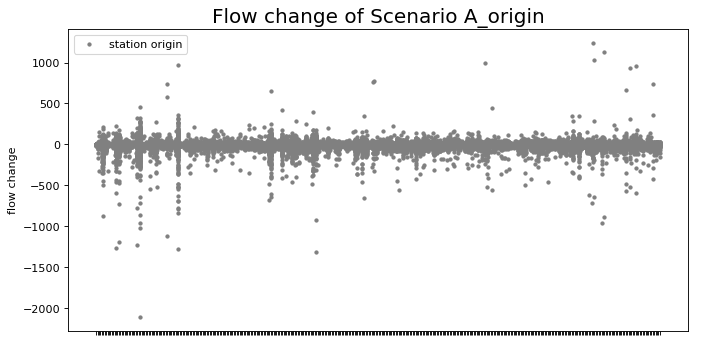

In [214]:
plt.figure(figsize=(10,5),dpi = 80)
plt.title("Flow change of Scenario A_origin",fontsize=18)
plt.scatter(cdatasub_job50['station_origin'],cdatasub_job50['flowchange_A'],color='grey',label='station origin', s=8)

plt.xticks(color='w') 
plt.legend()
plt.ylabel("flow change")
#plt.savefig('scenarioA_1')
plt.show()

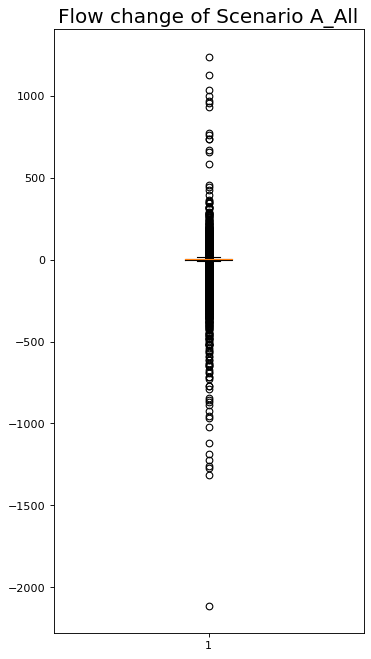

In [251]:
plt.figure(figsize=(5,10),dpi = 80)
plt.title("Flow change of Scenario A_All",fontsize=18)
plt.boxplot(cdatasub_job50['flowchange_A'])
plt.savefig('scenarioA_all')
plt.show()

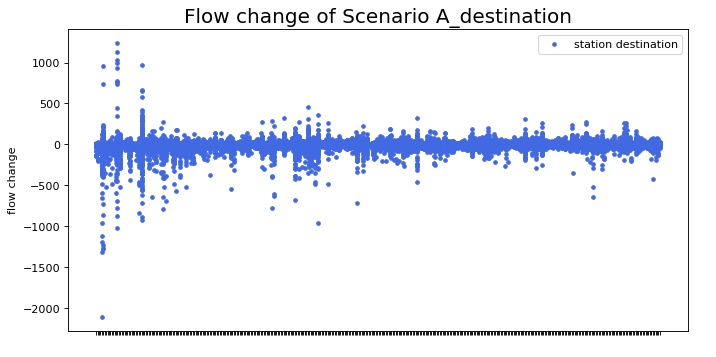

In [194]:
plt.figure(figsize=(10,5),dpi = 80)
plt.title("Flow change of Scenario A_destination",fontsize=18)
plt.scatter(cdatasub_job50['station_destination'],cdatasub_job50['flowchange_A'],color='royalblue', label='station destination', s=10)
plt.xticks(color='w') 
plt.legend()
plt.ylabel("flow change")
plt.savefig('scenarioA_2')
plt.show()


In [192]:
cdatasub_job50.to_csv('cdatasub_job50.csv')

### Scen B

#### Beta value 1

In [146]:
beta_d = -doubSim1.params[-1]

beta_B1=beta_d*1.5
beta_B1

0.00023155453823579887

In [147]:
cdatasub_b1 = cdatasub.copy()
cdatasub_b1

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698,4.0,0.000002,0.874806,4.0,-4.711688,5.0
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815,46.0,0.000002,0.915521,46.0,-2.747233,54.0
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400,10.0,0.000005,2.118110,10.0,-1.853468,14.0
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301,2.0,0.000005,2.083985,2.0,-4.489744,2.0
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400,30.0,0.000003,2.118110,30.0,-0.944164,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,1132,0.0,0.000033,2.070728,0.0,-0.734629,0.0
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,243,0.0,0.000010,6.869364,0.0,-0.212843,0.0
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,243,0.0,0.000011,6.869364,0.0,-0.602546,0.0
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,498,0.0,0.000033,7.941496,0.0,-0.734629,0.0


In [150]:
cdatasub_b1['SIM_est_exp_scB1'] = np.round(cdatasub_b1['O_i'] * cdatasub_b1['Ai_exp'] * cdatasub_b1['D_j'] * cdatasub_b1['Bj_exp'] * 
                                   np.exp(cdatasub_b1['distance']*-beta_B1))
pd.pivot_table(cdatasub_b1,values='SIM_est_exp_scB1',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,431.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,693.0
Acton Town,0,0,0,3,3,0,11,0,0,4,...,12,1,0,11,0,0,0,0,0,1761.0
Aldgate,0,0,0,0,29,0,0,0,0,18,...,2,0,1,1,0,0,0,0,0,2041.0
Aldgate East,0,0,0,34,0,0,0,0,0,18,...,2,0,1,1,0,0,0,0,0,2221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,11,15,0,0,0,0,6,...,1,0,1,0,0,0,0,0,0,1641.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,329.0
Woodside Park,0,0,0,4,4,0,0,0,0,8,...,1,0,1,0,0,0,0,0,0,1075.0


In [153]:
cdatasub_b1

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p,SIM_est_exp_scB1
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698,4.0,0.000002,0.874806,4.0,-4.711688,5.0,4.0
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815,46.0,0.000002,0.915521,46.0,-2.747233,54.0,45.0
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400,10.0,0.000005,2.118110,10.0,-1.853468,14.0,9.0
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301,2.0,0.000005,2.083985,2.0,-4.489744,2.0,2.0
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400,30.0,0.000003,2.118110,30.0,-0.944164,34.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,1132,0.0,0.000033,2.070728,0.0,-0.734629,0.0,0.0
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,243,0.0,0.000010,6.869364,0.0,-0.212843,0.0,0.0
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,243,0.0,0.000011,6.869364,0.0,-0.602546,0.0,0.0
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,498,0.0,0.000033,7.941496,0.0,-0.734629,0.0,0.0


In [154]:
cdatasub_b1 = balance_doubly_constrained(cdatasub_b1,'station_origin','station_destination','O_i','D_j','distance',-beta_B1,
                                             'exponential','Ai_exp_B','Bj_exp_B')

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33


In [155]:
# Now predict the model again using the new Ai and Dj fields.
cdatasub_b1['SIM_est_exp_B1_F'] = np.round(cdatasub_b1['O_i'] * cdatasub_b1['Ai_exp_B'] * cdatasub_b1['D_j'] * cdatasub_b1['Bj_exp_B'] * 
                                   np.exp(cdatasub_b1['distance']*-beta_B1))

In [157]:
cdatasub_b1

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p,SIM_est_exp_scB1,Ai_exp_B,Bj_exp_B,SIM_est_exp_B1_F
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,...,4.0,0.000002,0.874806,4.0,-4.711688,5.0,4.0,0.000002,0.880752,5.0
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,...,46.0,0.000002,0.915521,46.0,-2.747233,54.0,45.0,0.000002,0.927292,60.0
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,...,10.0,0.000005,2.118110,10.0,-1.853468,14.0,9.0,0.000007,1.728740,10.0
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,...,2.0,0.000005,2.083985,2.0,-4.489744,2.0,2.0,0.000007,1.694997,2.0
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,...,30.0,0.000003,2.118110,30.0,-0.944164,34.0,29.0,0.000004,1.728740,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,...,0.0,0.000033,2.070728,0.0,-0.734629,0.0,0.0,0.000100,0.944915,0.0
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,...,0.0,0.000010,6.869364,0.0,-0.212843,0.0,0.0,0.000030,1.394658,0.0
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,...,0.0,0.000011,6.869364,0.0,-0.602546,0.0,0.0,0.000036,1.394658,0.0
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,...,0.0,0.000033,7.941496,0.0,-0.734629,0.0,0.0,0.000100,4.509387,0.0


In [158]:
cdatasub_b1['flowchange_B_1']=cdatasub_b1['doubsimfitted1']-cdatasub_b1['SIM_est_exp_B1_F']

In [159]:
#de
B_sorted_1=cdatasub_b1.sort_values(by=['flowchange_B_1'],ascending=True)[0:10]
B_sorted_1['line']=B_sorted_1['station_origin']+" to "+B_sorted_1['station_destination']
B_sorted_1

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p,SIM_est_exp_scB1,Ai_exp_B,Bj_exp_B,SIM_est_exp_B1_F,flowchange_B_1,line
7263,Stratford,Canary Wharf,3875,59311,58772,5482.674320,10.990550,10.981421,8.609348,59311,...,0.904224,3747.0,0.553267,3002.0,2454.0,0.000005,0.915780,4691.0,-944.0,Stratford to Canary Wharf
1192,North Greenwich,Canary Wharf,1616,10931,58772,1829.783291,9.299358,10.981421,7.511953,10931,...,0.904224,1565.0,-0.974347,1140.0,1359.0,0.000006,0.915780,2466.0,-901.0,North Greenwich to Canary Wharf
246,Liverpool Street,Bank and Monument,812,31473,78549,841.502684,10.356885,11.271478,6.735189,31473,...,0.743537,2921.0,-0.614649,2366.0,2737.0,0.000002,0.756150,3797.0,-876.0,Liverpool Street to Bank and Monument
2480,Canning Town,Canary Wharf,1258,21125,58772,2857.591052,9.958212,10.981421,7.957734,21125,...,0.904224,2058.0,-0.444095,1655.0,1650.0,0.000005,0.915780,2929.0,-871.0,Canning Town to Canary Wharf
280,London Bridge,Bank and Monument,445,32597,78549,886.728371,10.391976,11.271478,6.787539,32593,...,0.743537,2962.0,-0.595690,2395.0,2766.0,0.000002,0.756150,3777.0,-815.0,London Bridge to Bank and Monument
2127,Canada Water,Canary Wharf,4030,27026,58772,2601.866276,10.204555,10.981421,7.863984,27026,...,0.904224,2134.0,-0.503019,1623.0,1746.0,0.000004,0.915780,2803.0,-669.0,Canada Water to Canary Wharf
245,Bank and Monument,Liverpool Street,1138,29494,61122,841.502684,10.291942,11.020627,6.735189,29494,...,0.676598,1767.0,-0.752161,1706.0,1656.0,0.000002,0.714877,2377.0,-610.0,Bank and Monument to Liverpool Street
2699,Southfields,Wimbledon,1088,5219,6295,3015.562035,8.560061,8.747511,8.011542,5219,...,3.766771,414.0,-1.258052,132.0,328.0,0.000010,5.745813,982.0,-568.0,Southfields to Wimbledon
2046,Waterloo,Bank and Monument,15946,67372,78549,2542.954444,11.117985,11.271478,7.841082,67314,...,0.743537,4557.0,0.089300,3686.0,3745.0,0.000002,0.756150,5103.0,-546.0,Waterloo to Bank and Monument
1438,Finsbury Park,Highbury & Islington,3659,24735,25385,2057.343960,10.115975,10.141914,7.629171,24735,...,0.736888,978.0,-0.389188,1048.0,835.0,0.000005,0.758434,1511.0,-533.0,Finsbury Park to Highbury & Islington


In [161]:
#in
B_sorted_2=cdatasub_b1.sort_values(by=['flowchange_B_1'],ascending=False)[0:10]
B_sorted_2['line']=B_sorted_2['station_origin']+" to "+B_sorted_2['station_destination']
B_sorted_2

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p,SIM_est_exp_scB1,Ai_exp_B,Bj_exp_B,SIM_est_exp_B1_F,flowchange_B_1,line
11648,Waterloo,Canary Wharf,8085,67372,58772,7433.985750,11.117985,10.981421,8.913817,67314,...,0.904224,1949.0,0.089300,1400.0,1098.0,0.000002,0.915780,1490.0,459.0,Waterloo to Canary Wharf
18118,Waterloo,Stratford,1268,67372,55954,10082.918400,11.117985,10.932285,9.218598,67314,...,0.568878,776.0,0.089300,899.0,356.0,0.000002,0.524821,440.0,336.0,Waterloo to Stratford
23691,Ilford,Liverpool Street,1684,5298,61122,12333.760300,8.575085,11.020627,9.420096,5298,...,0.676598,1460.0,0.622375,1160.0,564.0,0.000086,0.714877,1144.0,316.0,Ilford to Liverpool Street
16986,Victoria,Canary Wharf,379,37517,58772,9622.400713,10.532549,10.981421,9.171849,37517,...,0.904224,837.0,-0.416604,604.0,398.0,0.000003,0.915780,559.0,278.0,Victoria to Canary Wharf
22094,Stratford,Oxford Circus,1047,59311,44368,11721.487670,10.990550,10.700274,9.369179,59311,...,0.800903,956.0,0.553267,934.0,387.0,0.000005,0.802362,732.0,224.0,Stratford to Oxford Circus
28782,Woolwich Arsenal,Bank and Monument,1340,7892,78549,14441.593530,8.973605,11.271478,9.577868,7892,...,0.743537,860.0,0.518041,915.0,282.0,0.000039,0.756150,643.0,217.0,Woolwich Arsenal to Bank and Monument
42505,Romford,Liverpool Street,1714,4423,61122,20441.848350,8.394573,11.020627,9.925339,4423,...,0.676598,861.0,1.271257,641.0,178.0,0.000382,0.714877,649.0,212.0,Romford to Liverpool Street
15885,King's Cross St. Pancras,Canary Wharf,388,28307,58772,9190.448637,10.250864,10.981421,9.125920,28307,...,0.904224,647.0,-0.746418,464.0,318.0,0.000002,0.915780,439.0,208.0,King's Cross St. Pancras to Canary Wharf
21595,Lewisham,Bank and Monument,585,7868,78549,11514.359700,8.970559,11.271478,9.351350,7868,...,0.743537,956.0,0.236230,1080.0,393.0,0.000023,0.756150,750.0,206.0,Lewisham to Bank and Monument
33848,Chadwell Heath,Liverpool Street,1233,3912,61122,16572.260310,8.271804,11.020627,9.715486,3912,...,0.676598,905.0,0.718616,667.0,252.0,0.000190,0.714877,700.0,205.0,Chadwell Heath to Liverpool Street


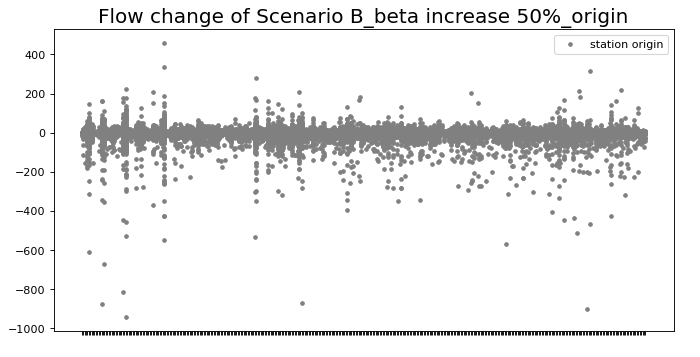

In [231]:
plt.figure(figsize=(10,5), dpi=80)
plt.title("Flow change of Scenario B_beta increase 50%_origin",fontsize=18)
plt.scatter(cdatasub_b1['station_origin'],cdatasub_b1['flowchange_B_1'],color='grey',label='station origin', s=10)
plt.xticks(color='w')
plt.legend()
plt.savefig('ScenarioB_11')
plt.show()

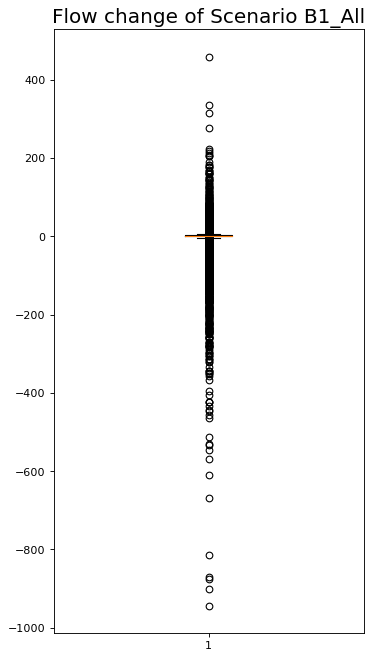

In [249]:
plt.figure(figsize=(5,10),dpi = 80)
plt.title("Flow change of Scenario B1_All",fontsize=18)
plt.boxplot(cdatasub_b1['flowchange_B_1'])
plt.savefig('ScenarioB1_all')
plt.show()

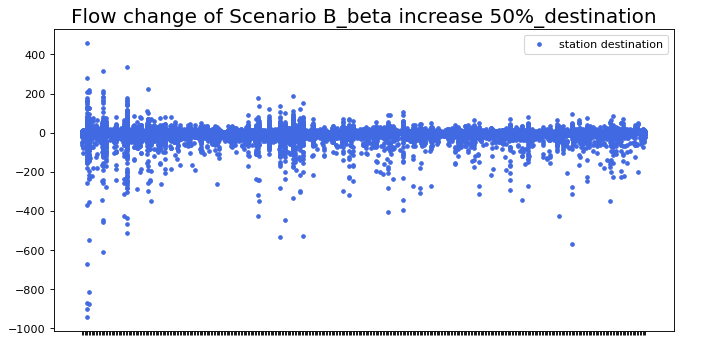

In [236]:
plt.figure(figsize=(10,5), dpi=80)
plt.title("Flow change of Scenario B_beta increase 50%_destination",fontsize=18)
plt.scatter(cdatasub_b1['station_destination'],cdatasub_b1['flowchange_B_1'],color='royalblue', label='station destination', s=10)
plt.xticks(color='w')
plt.legend()
plt.savefig('ScenarioB_12')
plt.show()

In [209]:
cdatasub_b1.to_csv('cdatasub_b1.csv')

#### Beta value 2

In [215]:
beta_B2=beta_d*3
beta_B2

0.00046310907647159773

In [216]:
cdatasub_b2 = cdatasub.copy()
cdatasub_b2

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p
0,Mansion House,Cannon Street,1,516,4698,248.178706,6.246107,8.454892,5.514149,516,4698,4.0,0.000002,0.874806,4.0,-4.711688,5.0
1,Cannon Street,Mansion House,17,3874,7815,248.178706,8.262043,8.963800,5.514149,3874,7815,46.0,0.000002,0.915521,46.0,-2.747233,54.0
2,Poplar,West India Quay,3,2271,400,260.862574,7.727976,5.991465,5.563994,2271,400,10.0,0.000005,2.118110,10.0,-1.853468,14.0
3,West India Quay,Poplar,0,162,1301,260.862574,5.087596,7.170888,5.563994,162,1301,2.0,0.000005,2.083985,2.0,-4.489744,2.0
4,Canary Wharf,West India Quay,14,14632,400,327.244216,9.590966,5.991465,5.790707,14632,400,30.0,0.000003,2.118110,30.0,-0.944164,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Heathrow Terminal 5,Upminster,0,938,1132,58394.297550,6.843750,7.031741,10.974974,938,1132,0.0,0.000033,2.070728,0.0,-0.734629,0.0
61409,Morden,Chesham,0,8035,243,59183.467370,8.991562,5.493061,10.988398,8035,243,0.0,0.000010,6.869364,0.0,-0.212843,0.0
61410,Gants Hill,Chesham,0,5243,243,60341.935680,8.564649,5.493061,11.007783,5243,243,0.0,0.000011,6.869364,0.0,-0.602546,0.0
61411,Heathrow Terminal 5,Epping,0,938,498,60633.323740,6.843750,6.210600,11.012600,938,498,0.0,0.000033,7.941496,0.0,-0.734629,0.0


In [217]:
cdatasub_b2['SIM_est_exp_scB2'] = np.round(cdatasub_b2['O_i'] * cdatasub_b2['Ai_exp'] * cdatasub_b2['D_j'] * cdatasub_b2['Bj_exp'] * 
                                   np.exp(cdatasub_b2['distance']*-beta_B2))

In [218]:
pd.pivot_table(cdatasub_b2,values='SIM_est_exp_scB2',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,207.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,245.0
Acton Town,0,0,0,0,0,0,4,0,0,0,...,0,0,0,3,0,0,0,0,0,390.0
Aldgate,0,0,0,0,21,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,963.0
Aldgate East,0,0,0,24,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,1012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,190.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,132.0
Woodside Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,163.0


In [219]:
cdatasub_b2 = balance_doubly_constrained(cdatasub_b2,'station_origin','station_destination','O_i','D_j','distance',-beta_B2,'exponential','Ai_exp_B','Bj_exp_B')

# Now predict the model again using the new Ai and Dj fields.
cdatasub_b2['SIM_est_exp_B2_F'] = np.round(cdatasub_b2['O_i'] * cdatasub_b2['Ai_exp_B'] * cdatasub_b2['D_j'] * cdatasub_b2['Bj_exp_B'] * 
                                   np.exp(cdatasub_b2['distance']*-beta_B2))

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

In [220]:
pd.pivot_table(cdatasub_b2,values='SIM_est_exp_B2_F',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,599.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1223.0
Acton Town,0,0,0,1,1,0,5,0,0,2,...,9,0,0,40,0,0,0,0,0,3739.0
Aldgate,0,0,0,0,59,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,2875.0
Aldgate East,0,0,0,82,0,0,0,0,0,27,...,0,0,0,0,0,0,0,0,0,3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,36,58,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,4856.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,0,6,5,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,3088.0


In [221]:
cdatasub_b2['flowchange_B_2']=cdatasub_b2['doubsimfitted1']-cdatasub_b2['SIM_est_exp_B2_F']

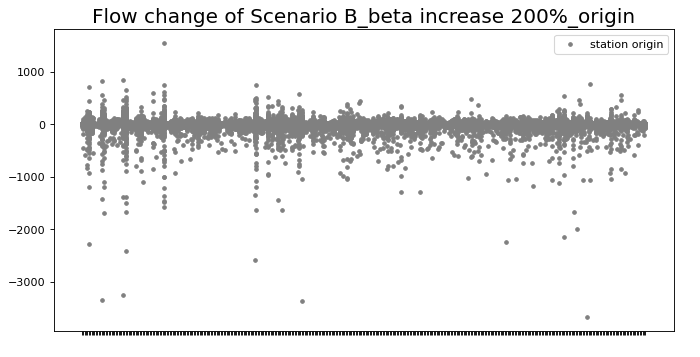

In [238]:
plt.figure(figsize=(10,5), dpi=80)
plt.title("Flow change of Scenario B_beta increase 200%_origin",fontsize=18)
plt.scatter(cdatasub_b2['station_origin'],cdatasub_b2['flowchange_B_2'],label='station origin',color='grey',s=10)
plt.xticks(color='w') 
plt.legend()
plt.savefig('ScenarioB_21')
plt.show()

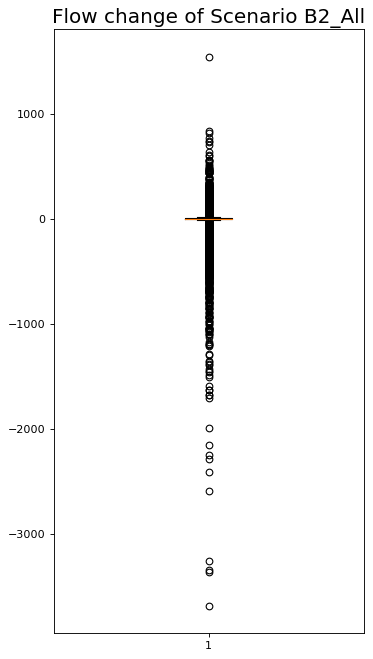

In [250]:
plt.figure(figsize=(5,10),dpi = 80)
plt.title("Flow change of Scenario B2_All",fontsize=18)
plt.boxplot(cdatasub_b2['flowchange_B_2'])
plt.savefig('ScenarioB2_all')
plt.show()

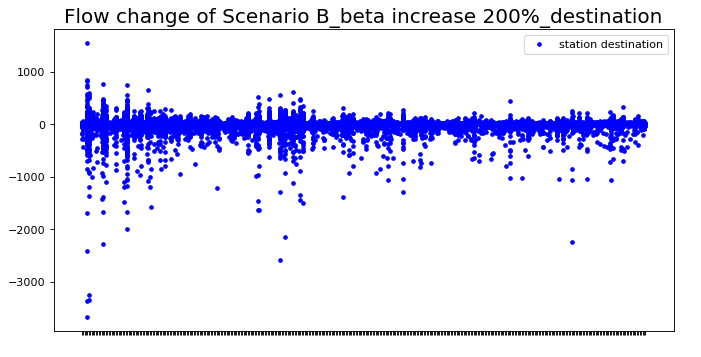

In [240]:
plt.figure(figsize=(10,5), dpi=80)
plt.title("Flow change of Scenario B_beta increase 200%_destination",fontsize=18)
plt.scatter(cdatasub_b2['station_destination'],cdatasub_b2['flowchange_B_2'],color='blue', label='station destination',s=10)
plt.xticks(color='w') 
plt.legend()
plt.savefig('ScenarioB_22')
plt.show()

In [224]:
#de
B_sorted_3=cdatasub_b2.sort_values(by=['flowchange_B_2'],ascending=True)[0:10]
B_sorted_3['line']=B_sorted_3['station_origin']+" to "+B_sorted_3['station_destination']
B_sorted_3

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p,SIM_est_exp_scB2,Ai_exp_B,Bj_exp_B,SIM_est_exp_B2_F,flowchange_B_2,line
1192,North Greenwich,Canary Wharf,1616,10931,58772,1829.783291,9.299358,10.981421,7.511953,10931,...,0.904224,1565.0,-0.974347,1140.0,890.0,0.000019,0.986905,5248.0,-3683.0,North Greenwich to Canary Wharf
2480,Canning Town,Canary Wharf,1258,21125,58772,2857.591052,9.958212,10.981421,7.957734,21125,...,0.904224,2058.0,-0.444095,1655.0,852.0,0.000017,0.986905,5421.0,-3363.0,Canning Town to Canary Wharf
246,Liverpool Street,Bank and Monument,812,31473,78549,841.502684,10.356885,11.271478,6.735189,31473,...,0.743537,2921.0,-0.614649,2366.0,2253.0,0.000003,1.122873,6263.0,-3342.0,Liverpool Street to Bank and Monument
280,London Bridge,Bank and Monument,445,32597,78549,886.728371,10.391976,11.271478,6.787539,32593,...,0.743537,2962.0,-0.595690,2395.0,2253.0,0.000003,1.122873,6219.0,-3257.0,London Bridge to Bank and Monument
1438,Finsbury Park,Highbury & Islington,3659,24735,25385,2057.343960,10.115975,10.141914,7.629171,24735,...,0.736888,978.0,-0.389188,1048.0,518.0,0.000017,0.883889,3571.0,-2593.0,Finsbury Park to Highbury & Islington
7263,Stratford,Canary Wharf,3875,59311,58772,5482.674320,10.990550,10.981421,8.609348,59311,...,0.904224,3747.0,0.553267,3002.0,690.0,0.000023,0.986905,6160.0,-2413.0,Stratford to Canary Wharf
245,Bank and Monument,Liverpool Street,1138,29494,61122,841.502684,10.291942,11.020627,6.735189,29494,...,0.676598,1767.0,-0.752161,1706.0,1363.0,0.000003,1.106098,4052.0,-2285.0,Bank and Monument to Liverpool Street
2699,Southfields,Wimbledon,1088,5219,6295,3015.562035,8.560061,8.747511,8.011542,5219,...,3.766771,414.0,-1.258052,132.0,163.0,0.000034,9.574582,2657.0,-2243.0,Southfields to Wimbledon
2799,Brixton,Vauxhall,1801,23381,16242,3093.593251,10.059679,9.695356,8.037089,23381,...,1.085049,814.0,-0.342342,669.0,313.0,0.000020,1.657215,2970.0,-2156.0,Brixton to Vauxhall
1502,Leyton,Stratford,1193,7651,55954,2131.342926,8.942592,10.932285,7.664508,7651,...,0.568878,821.0,-1.090075,934.0,425.0,0.000053,0.330612,2810.0,-1989.0,Leyton to Stratford


In [225]:
#in
B_sorted_4=cdatasub_b2.sort_values(by=['flowchange_B_2'],ascending=False)[0:10]
B_sorted_4['line']=B_sorted_4['station_origin']+" to "+B_sorted_4['station_destination']
B_sorted_4

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,Bj_exp,SIM_est_exp2,alpha_i1,prosimfit_p,SIM_est_exp_scB2,Ai_exp_B,Bj_exp_B,SIM_est_exp_B2_F,flowchange_B_2,line
11648,Waterloo,Canary Wharf,8085,67372,58772,7433.985750,11.117985,10.981421,8.913817,67314,...,0.904224,1949.0,0.089300,1400.0,196.0,0.000003,0.986905,404.0,1545.0,Waterloo to Canary Wharf
7699,London Bridge,Canary Wharf,6165,32597,58772,5679.209735,10.391976,10.981421,8.644567,32593,...,0.904224,1286.0,-0.595690,923.0,223.0,0.000003,0.986905,444.0,842.0,London Bridge to Canary Wharf
8549,Liverpool Street,Canary Wharf,24,31473,58772,6093.864865,10.356885,10.981421,8.715038,31473,...,0.904224,1181.0,-0.614649,850.0,180.0,0.000003,0.986905,362.0,819.0,Liverpool Street to Canary Wharf
23691,Ilford,Liverpool Street,1684,5298,61122,12333.760300,8.575085,11.020627,9.420096,5298,...,0.676598,1460.0,0.622375,1160.0,32.0,0.000586,1.106098,694.0,766.0,Ilford to Liverpool Street
18118,Waterloo,Stratford,1268,67372,55954,10082.918400,11.117985,10.932285,9.218598,67314,...,0.568878,776.0,0.089300,899.0,34.0,0.000003,0.330612,38.0,738.0,Waterloo to Stratford
16986,Victoria,Canary Wharf,379,37517,58772,9622.400713,10.532549,10.981421,9.171849,37517,...,0.904224,837.0,-0.416604,604.0,43.0,0.000004,0.986905,100.0,737.0,Victoria to Canary Wharf
7055,Bank and Monument,Canary Wharf,2339,29494,58772,5387.422428,10.291942,10.981421,8.591822,29494,...,0.904224,1125.0,-0.752161,826.0,213.0,0.000003,0.986905,423.0,702.0,Bank and Monument to Canary Wharf
22094,Stratford,Oxford Circus,1047,59311,44368,11721.487670,10.990550,10.700274,9.369179,59311,...,0.800903,956.0,0.553267,934.0,26.0,0.000023,1.204727,316.0,640.0,Stratford to Oxford Circus
14410,Waterloo,Hammersmith,338,67372,18250,8587.481192,11.117985,9.811920,9.058061,67314,...,1.287979,721.0,0.089300,485.0,51.0,0.000003,1.465670,109.0,612.0,Waterloo to Hammersmith
21595,Lewisham,Bank and Monument,585,7868,78549,11514.359700,8.970559,11.271478,9.351350,7868,...,0.743537,956.0,0.236230,1080.0,27.0,0.000107,1.122873,358.0,598.0,Lewisham to Bank and Monument


In [226]:
cdatasub_b2.to_csv('cdatasub_b2.csv')

### Compare and discuss

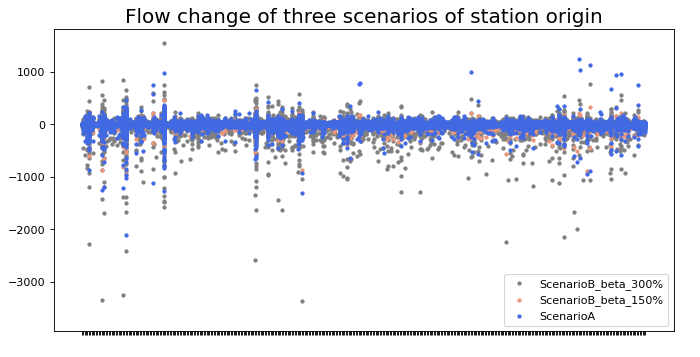

In [247]:
plt.figure(figsize=(10,5), dpi=80)
plt.title("Flow change of three scenarios of station origin",fontsize=18)
plt.scatter(cdatasub_b2['station_origin'],cdatasub_b2['flowchange_B_2'],color='grey', label='ScenarioB_beta_300%', s= 8)
plt.scatter(cdatasub_b1['station_origin'],cdatasub_b1['flowchange_B_1'],color='darksalmon', label='ScenarioB_beta_150%', s= 8)
plt.scatter(cdatasub_job50['station_origin'],cdatasub_job50['flowchange_A'],color='royalblue',label='ScenarioA', s= 8)

plt.xticks(color='w') 
plt.legend()
plt.savefig('F1')
plt.show()

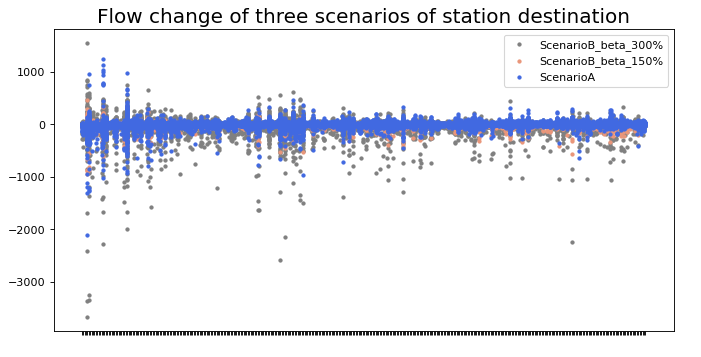

In [248]:
plt.figure(figsize=(10,5), dpi=80)
plt.title("Flow change of three scenarios of station destination",fontsize=18)
plt.scatter(cdatasub_b2['station_destination'],cdatasub_b2['flowchange_B_2'],color='grey', label='ScenarioB_beta_300%', s= 8)
plt.scatter(cdatasub_b1['station_destination'],cdatasub_b1['flowchange_B_1'],color='darksalmon', label='ScenarioB_beta_150%', s= 8)
plt.scatter(cdatasub_job50['station_destination'],cdatasub_job50['flowchange_A'],color='royalblue',label='ScenarioA', s= 8)

plt.xticks(color='w') 
plt.legend()
plt.savefig('F2')
plt.show()